#  기하평균의 중요성
### 장기투자의 최종 수익률을 결정하는 것은 기하평균

<img src="http://i.imgur.com/nNJOhqx.png" >


#### 2017-2019 [FinanceData.KR]()

# 1000만원을 3년간 투자
어떤 사람이 1000만원을 3년간 투자. 격월로 +40% 수익과 -30% 손실이 반복된다면 3년 뒤 투자 결과는?

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

import numpy as np
import pandas as pd
from scipy import stats

# 기하평균 geometric mean
n개의 양수 값을 <br>모두 곱한 것의 n제곱근

$$ \left(\prod_{i=1}^n a_i \right)^{1/n} = (a_1 \cdot a_2 \dotsb a_n)^{1/n} = \sqrt[n]{a_1 \cdot a_2 \dotsb a_n} $$

```python
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))
```

# 산술평균 vs 기하평균
10과 20의 산술평균은 15지만 기하평균은 두 숫자를 곱한 값인 200의 제곱근인 14.1 이다

In [0]:
vals = np.array([10, 20])
print('산술평균: ', np.mean(vals) )
print('기하평균: ', stats.gmean(vals) )

산술평균:  15.0
기하평균:  14.1421356237


# 마이너스 수익률과 기하평균

기하평균 수익률을 계산할 때 음수 값은 기하평균으로 계산할 수 없다. (음수의 제곱근은 허수가 되기 때문) <br/>
예를 들어, +40%, -30% 수익률의 산술평균과 기하평균을 계산하고자 한다면, 모든 수익률에 +1을 하고, 기하 평균을 구한뒤 다시 1을 빼준다.

In [0]:
returns = np.array([0.4, -0.3])

print('월수익률 기하평균: ', stats.gmean(returns))

월수익률 기하평균:  nan


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:314: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


In [0]:
returns = np.array([0.4, -0.3]) 
print(returns)
print('월수익률 기하평균: ', stats.gmean(returns + 1) - 1) # -1.0%

[ 0.4 -0.3]
월수익률 기하평균:  -0.0100505063388


# 1000만원을 3년간 투자
어떤 사람이 1000만원을 3년간 투자한 월별 수익률의 산술평균이 5%라고 하자. 이것이 월 40% 수익과 30% 손실이 반복된 결과라면 3년 뒤 계좌에 남아 있는 돈은 480만원밖에 안 된다. 손실이 났고 기하평균을 하면 수익률은 월평균 -1%다.

* 매월 수익률 +40%, -30% 을 반복
* 월별 수익률의 산술평균: 5%
* 월별 수익률의 기하평균: -1%

In [0]:
returns = np.array([0.4, -0.3])
print(returns)

print('월수익률(산술평균): ', np.mean(returns) )
print('월수익률(기하평균): ', stats.gmean(returns + 1) - 1)

[ 0.4 -0.3]
월수익률(산술평균):  0.05
월수익률(기하평균):  -0.0100505063388


In [0]:
# 매월 40%, -30% 반복 (총 36개월)
# (원문의 내용은 계산상 매월 40%, -30% 반복되어야 계산이 맞다)

data = {
    'returns' : [0] + [ 0.4, -0.3 ] * 36,
    'balance': 0
}

df = pd.DataFrame(data)
df.head(10)

,balance,returns
0,0,0.0
1,0,0.4
2,0,-0.3
3,0,0.4
4,0,-0.3
5,0,0.4
6,0,-0.3
7,0,0.4
8,0,-0.3
9,0,0.4


In [0]:
# 초기 값: 1000 만원

df.loc[0, 'balance'] = 1000
df.head()

,balance,returns
0,1000,0.0
1,0,0.4
2,0,-0.3
3,0,0.4
4,0,-0.3


In [0]:
for i in range(1, len(df)):
    bal = df.loc[i-1, 'balance']
    df.loc[i, 'balance'] = bal + bal * df.loc[i, 'returns']

display(df.head(10))
print('...중략...')
display(df.tail())

,balance,returns
0,1000.000000,0.0
1,1400.000000,0.4
2,980.000000,-0.3
3,1372.000000,0.4
4,960.400000,-0.3
5,1344.560000,0.4
6,941.192000,-0.3
7,1317.668800,0.4
8,922.368160,-0.3
9,1291.315424,0.4


...중략...


,balance,returns
68,503.137368,-0.3
69,704.392315,0.4
70,493.074621,-0.3
71,690.304469,0.4
72,483.213128,-0.3


# 월별 +20%, -10%
반면 **월별**로 20%의 수익과 10%의 손실이 뒤섞였다면 잔액은 4000만원이 된다. 이익이 났고 기하수익은 월평균 3.9%다.

* 월별 수익률(격월): +20%, -10%
* 월별 수익률의 산술평균: +5%
* 월별 수익률의 기하평균: +3.9%


In [0]:
data = {
    'returns' : [0] + [ 0.2, -0.1 ] * 18,
    'balance': 0
}

df = pd.DataFrame(data)
df.loc[0, 'balance'] = 1000

for i in range(1, len(df)):
    bal = df.loc[i-1, 'balance']
    df.loc[i, 'balance'] = bal + bal * df.loc[i, 'returns']

display(df.head())
display(df.tail())

,balance,returns
0,1000.0,0.0
1,1200.0,0.2
2,1080.0,-0.1
3,1296.0,0.2
4,1166.4,-0.1


,balance,returns
32,3425.942643,-0.1
33,4111.131172,0.2
34,3700.018055,-0.1
35,4440.021666,0.2
36,3996.019499,-0.1


In [0]:
returns = np.array([0.2, -0.1])

print('월수익률(산술평균): ', np.mean(returns) )
print('월수익률(기하평균): ', stats.gmean(returns + 1) - 1)

월수익률(산술평균):  0.05
월수익률(기하평균):  0.0392304845413


# 동일한 조건에서 수익률 높이기
기하평균의 이런 성질을 잘 활용하면 똑같은 조건에서도 수익을 높일 수 있다. 40% 수익과 30%의 손실이 교차된 사례를 다시 보자. 

In [0]:
# 격월 40%, -30% 반복 (총 36개월)

data = {
    'returns' : [0] + [ 0.4, -0.3 ] * 18,
    'balance': 0
}

# 초기 값: 1000 만원
df = pd.DataFrame(data)

원금 1000만원을 모두 투자하면 손실이 나지만,

In [0]:
df.loc[0, 'balance'] = 1000

for i in range(1, len(df)):
    bal = df.loc[i-1, 'balance']
    df.loc[i, 'balance'] = bal + bal * df.loc[i, 'returns']

display(df.tail())

,balance,returns
32,723.797721,-0.3
33,1013.316809,0.4
34,709.321766,-0.3
35,993.050473,0.4
36,695.135331,-0.3


항상 전체의 40%만 투자 상태로 유지하면 이익이 나고 잔액은 3년 뒤 1450만원으로 늘어난다. 

In [0]:
df.loc[0, 'balance'] = 1000

for i in range(1, len(df)):
    bal = df.loc[i-1, 'balance']
    df.loc[i, 'balance'] = bal + (bal * 0.4) * df.loc[i, 'returns']

display(df.head())
display(df.tail())

,balance,returns
0,1000.00000,0.0
1,1160.00000,0.4
2,1020.80000,-0.3
3,1184.12800,0.4
4,1042.03264,-0.3


,balance,returns
32,1390.114528,-0.3
33,1612.532852,0.4
34,1419.028910,-0.3
35,1646.073535,0.4
36,1448.544711,-0.3


투자 비중이 줄면서 총 잔액 대비 16%의 수익과 12%의 손실이 교차되는 게임으로 바뀌었기 때문이다. 수익과 손실의 크기가 모두 감소했고 이들 간의 편차도 줄어 결과적으로 기하평균이 커졌다. 
* 전액 투자 수익률: +40%, -30%
* 잔액의 40% 투자 수익률: +16%, -12%


In [0]:
returns = np.array([0.4, -0.3])

print('수익률(산술평균): ', np.mean(returns) )
print('수익률(기하평균): ', stats.gmean(returns + 1) - 1)

수익률(산술평균):  0.05
수익률(기하평균):  -0.0100505063388


In [0]:
returns = np.array([0.16, -0.12])

print('수익률(산술평균): ', np.mean(returns) )
print('수익률(기하평균): ', stats.gmean(returns + 1) - 1)

수익률(산술평균):  0.02
수익률(기하평균):  0.0103464752252


좀 더 엄밀하게 계산하면 전체 금액의 41.5%를 투자할 때 수익률은 최대가 된다. 

In [0]:
returns = np.array([0.4, -0.3])

for i in np.linspace(0, 1, 21):
    g_ret = stats.gmean(returns * i + 1) - 1
    print('재투자 비율: %.0f %% , 수익률: %.5f' % (i * 100, g_ret))

재투자 비율: 0 % , 수익률: 0.00000
재투자 비율: 5 % , 수익률: 0.00235
재투자 비율: 10 % , 수익률: 0.00439
재투자 비율: 15 % , 수익률: 0.00613
재투자 비율: 20 % , 수익률: 0.00757
재투자 비율: 25 % , 수익률: 0.00871
재투자 비율: 30 % , 수익률: 0.00955
재투자 비율: 35 % , 수익률: 0.01010
재투자 비율: 40 % , 수익률: 0.01035
재투자 비율: 45 % , 수익률: 0.01030
재투자 비율: 50 % , 수익률: 0.00995
재투자 비율: 55 % , 수익률: 0.00931
재투자 비율: 60 % , 수익률: 0.00837
재투자 비율: 65 % , 수익률: 0.00712
재투자 비율: 70 % , 수익률: 0.00558
재투자 비율: 75 % , 수익률: 0.00374
재투자 비율: 80 % , 수익률: 0.00160
재투자 비율: 85 % , 수익률: -0.00085
재투자 비율: 90 % , 수익률: -0.00361
재투자 비율: 95 % , 수익률: -0.00667
재투자 비율: 100 % , 수익률: -0.01005


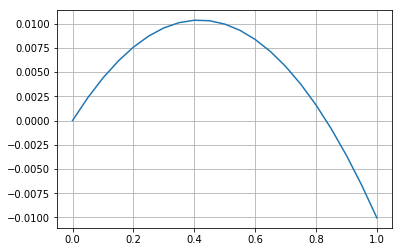

In [0]:
returns = np.array([0.4, -0.3])

x = np.linspace(0, 1, 21)
g_ret = [stats.gmean(returns * i + 1) - 1 for i in x]

plt.plot(x, g_ret)
plt.grid()
plt.show()

# 결론
* 현명한 자금 관리를 하려면 기하평균 중요
* 현금을 채권 등 안전 자산에 투자하면 수익률은 조금 더 높아진다
* 장기투자의 최종 수익률을 결정하는 것은 기하평균이다

https://goo.gl/nRqp2w '몰빵' 투자자, 月 40% 수익·30% 손실 반복하면…3년 뒤 수익률은 '마이너스' 아티클을 복기(復棋)하면서 검증 해본 글입니다.


#### 2017-2019 [FinanceData.KR]()